<a href="https://colab.research.google.com/github/rakshitarajan/Basic-ML/blob/main/Logistic_Regression_Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder


Load the Dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset (1).csv


In [4]:
# Replace with the correct filename after uploading
df = pd.read_csv('Titanic-Dataset.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Preprocess Missing Values

In [5]:
# Fill missing values for Age, Embarked, Fare
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare'] = df['Fare'].fillna(df['Fare'].median())


Encode Categorical Variables

In [6]:
# Encode Sex (male=1, female=0)
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

# Encode Embarked: S=0, C=1, Q=2
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


Select Features and Target

In [7]:
# Select input features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']


Split Data into Train and Test Sets

In [8]:
# 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


Train the Logistic Regression Model

In [9]:
# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Make Predictions and Evaluate

In [10]:
# Predict on test data
y_pred = model.predict(X_test)

# Accuracy and Confusion Matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7988826815642458
Confusion Matrix:
 [[89 16]
 [20 54]]


Predict with User Input (Interactive)

In [14]:
import ipywidgets as widgets
from IPython.display import display


pclass_widget = widgets.Dropdown(options=[1, 2, 3], description='Pclass:')
sex_widget = widgets.Dropdown(options=['male', 'female'], description='Sex:')
age_widget = widgets.FloatSlider(min=0, max=80, step=1, description='Age:')
sibsp_widget = widgets.IntSlider(min=0, max=8, description='SibSp:')
parch_widget = widgets.IntSlider(min=0, max=6, description='ParCh:')
fare_widget = widgets.FloatSlider(min=0, max=600, step=10, description='Fare:')
embarked_widget = widgets.Dropdown(options=['S', 'C', 'Q'], description='Embarked:')

button = widgets.Button(description="Predict")

output = widgets.Output()

def on_button_clicked(b):
    # Convert inputs
    sex = 1 if sex_widget.value == 'male' else 0
    embarked = {'S': 0, 'C': 1, 'Q': 2}[embarked_widget.value]

    input_data = {
        'Pclass': pclass_widget.value,
        'Sex': sex,
        'Age': age_widget.value,
        'SibSp': sibsp_widget.value,
        'Parch': parch_widget.value,
        'Fare': fare_widget.value,
        'Embarked': embarked
    }

    input_df = pd.DataFrame([input_data])
    prediction = model.predict(input_df)

    with output:
        output.clear_output()
        if prediction[0] == 1:
            print(" This passenger would SURVIVE.")
        else:
            print(" This passenger would NOT SURVIVE.")

# Attach event
button.on_click(on_button_clicked)

# Display everything
display(pclass_widget, sex_widget, age_widget, sibsp_widget, parch_widget, fare_widget, embarked_widget, button, output)


Dropdown(description='Pclass:', options=(1, 2, 3), value=1)

Dropdown(description='Sex:', options=('male', 'female'), value='male')

FloatSlider(value=0.0, description='Age:', max=80.0, step=1.0)

IntSlider(value=0, description='SibSp:', max=8)

IntSlider(value=0, description='ParCh:', max=6)

FloatSlider(value=0.0, description='Fare:', max=600.0, step=10.0)

Dropdown(description='Embarked:', options=('S', 'C', 'Q'), value='S')

Button(description='Predict', style=ButtonStyle())

Output()

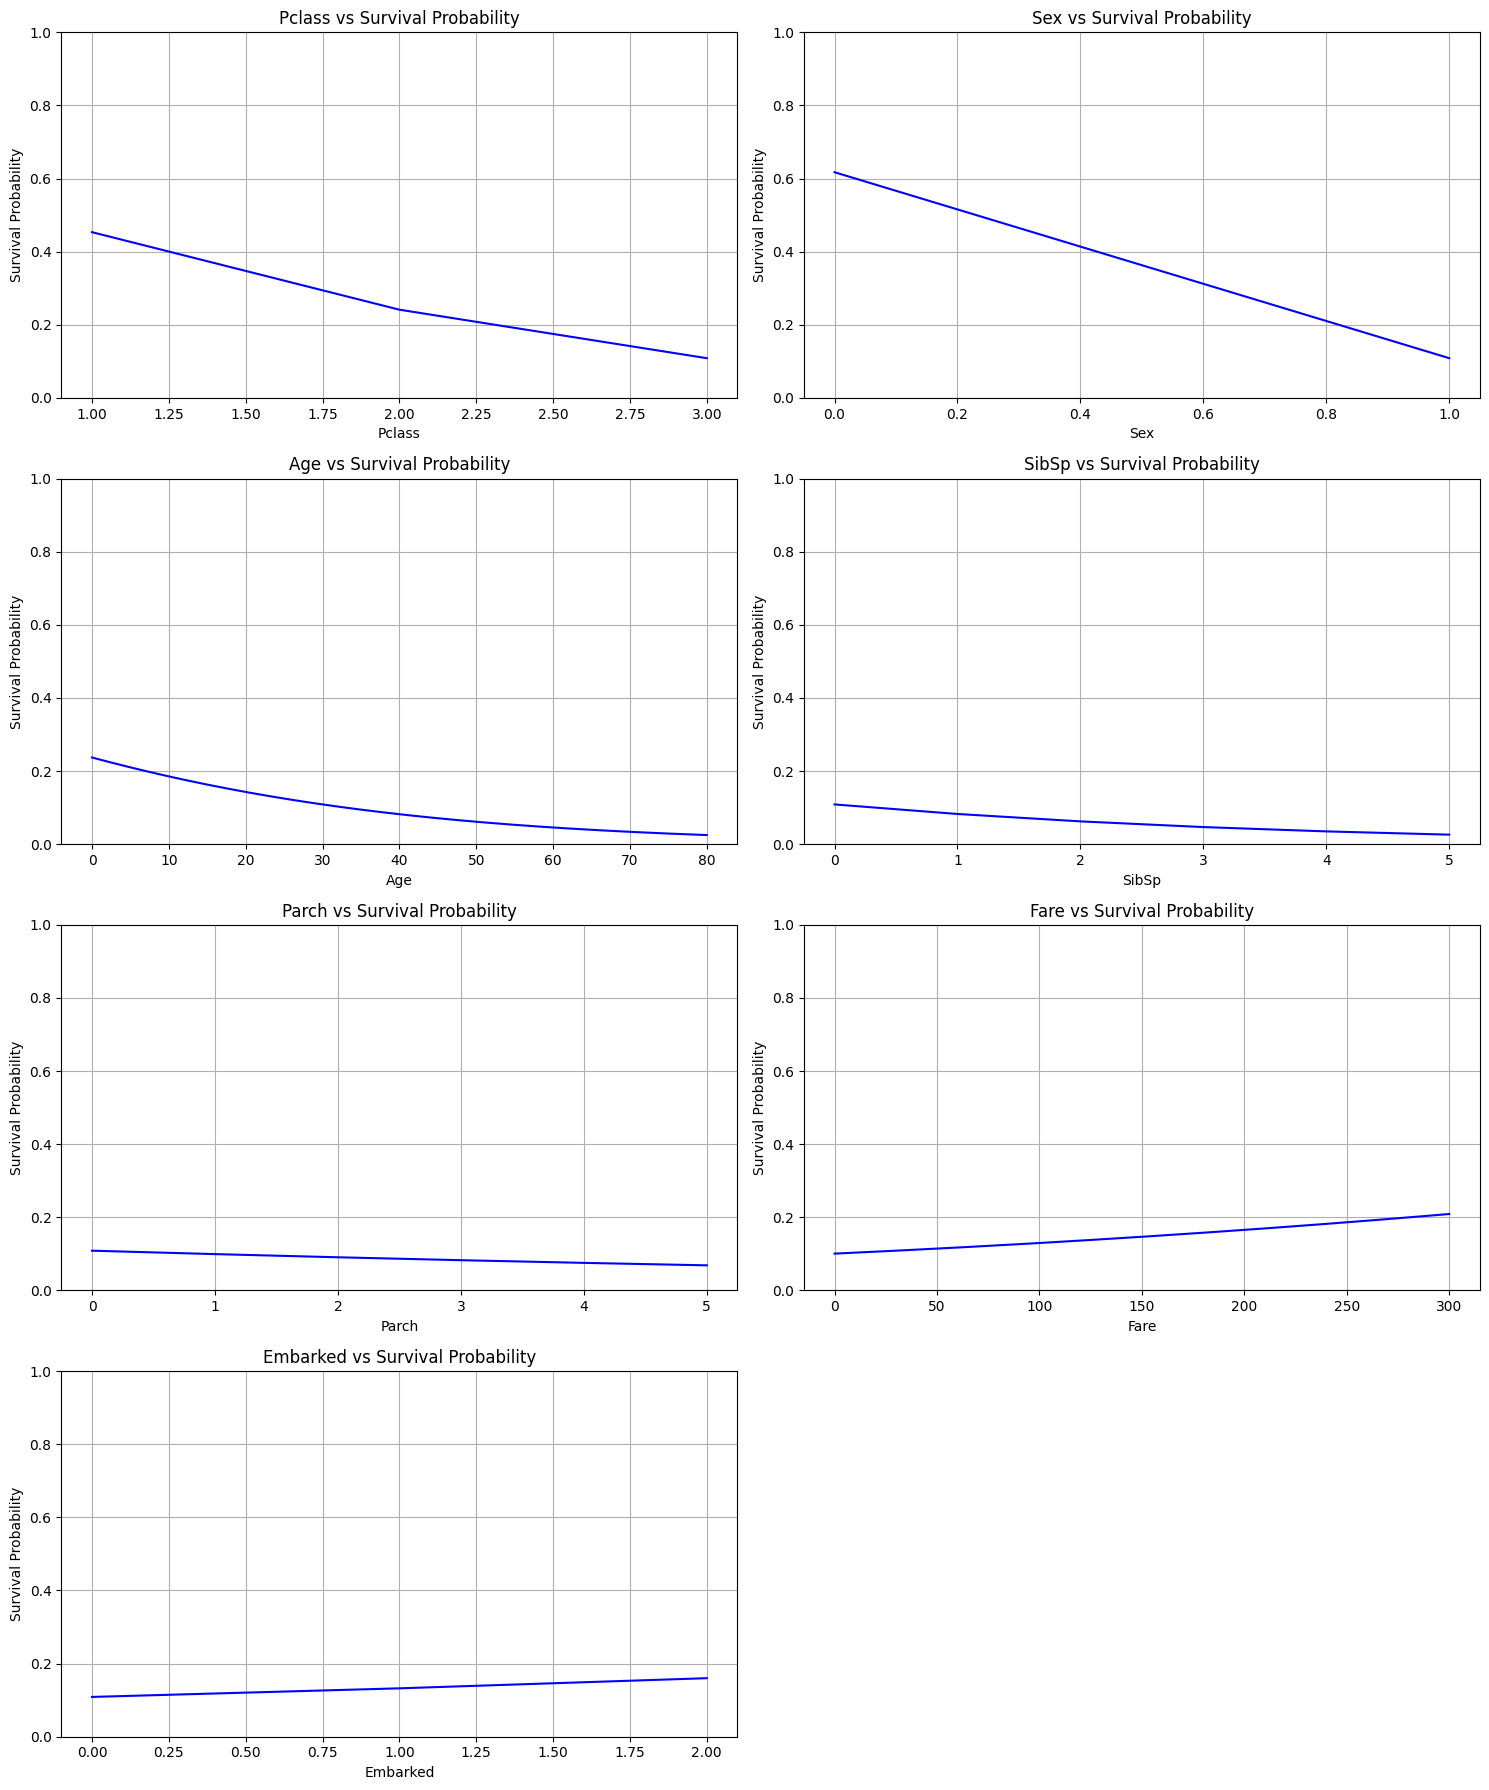

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create subplot grid
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 18))
axes = axes.flatten()

# Keep other features constant (typical passenger)
default_values = {
    'Pclass': 3,
    'Sex': 1,           # male
    'Age': 30,
    'SibSp': 0,
    'Parch': 0,
    'Fare': 30,
    'Embarked': 0
}

# Ranges for each feature to vary (manually defined)
feature_ranges = {
    'Pclass': [1, 2, 3],
    'Sex': [0, 1],
    'Age': np.linspace(0, 80, 200),
    'SibSp': np.arange(0, 6),
    'Parch': np.arange(0, 6),
    'Fare': np.linspace(0, 300, 200),
    'Embarked': [0, 1, 2]
}

# Plot for each feature
for i, feature in enumerate(features):
    X_vals = feature_ranges[feature]

    # Build test set where only current feature changes
    input_rows = []
    for val in X_vals:
        row = [default_values[f] if f != feature else val for f in features]
        input_rows.append(row)

    X_test_feature = pd.DataFrame(input_rows, columns=features)
    probs = model.predict_proba(X_test_feature)[:, 1]

    # Plot
    ax = axes[i]
    ax.plot(X_vals, probs, color='blue')
    ax.set_title(f"{feature} vs Survival Probability")
    ax.set_xlabel(feature)
    ax.set_ylabel("Survival Probability")
    ax.set_ylim(0, 1)
    ax.grid(True)

# Remove empty subplot (since we have 7 features but 8 plots)
if len(features) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()
